<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-torhec1234/blob/main/Actividad_semanal_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
#Importamos las librerias para el ejercicio 

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer, PowerTransformer
from sklearn.preprocessing import power_transform
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_validate, learning_curve, validation_curve
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn import metrics
from math import isnan
from sklearn.preprocessing import FunctionTransformer, PowerTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import MinMaxScaler

# 1) Descarga los datosEnlaces a un sitio externo. y carga el dataset en tu libreta. Descripción aquí. 

In [91]:
path = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv' 

df = pd.read_csv(path , sep = ',' )
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


# 2) Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [22]:
#Punto 
print("------------------------------------1------------------------------------------")
print("Numero de registros y Columnas : ")
print(df.shape)


------------------------------------1------------------------------------------
Numero de registros y Columnas : 
(30000, 25)


In [39]:
print("------------------------------------2------------------------------------------")
print("Nombre de las variables de entrada (Columnas)")
print(df.columns)
index = df.columns


------------------------------------2------------------------------------------
Nombre de las variables de entrada (Columnas)
Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')


In [24]:
print("------------------------------------3------------------------------------------")
print("Primeros 5 registros")
print(df.head())


------------------------------------3------------------------------------------
Primeros 5 registros
   ID      X1   X2   X3   X4    X5   X6   X7   X8   X9  ...      X15      X16  \
0   1   20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0  ...      0.0      0.0   
1   2  120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  ...   3272.0   3455.0   
2   3   90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  ...  14331.0  14948.0   
3   4   50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  ...  28314.0  28959.0   
4   5   50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  ...  20940.0  19146.0   

       X17     X18      X19      X20     X21     X22     X23    Y  
0      0.0     0.0    689.0      0.0     0.0     0.0     0.0  1.0  
1   3261.0     0.0   1000.0   1000.0  1000.0     0.0  2000.0  1.0  
2  15549.0  1518.0   1500.0   1000.0  1000.0  1000.0  5000.0  0.0  
3  29547.0  2000.0   2019.0   1200.0  1100.0  1069.0  1000.0  0.0  
4  19131.0  2000.0  36681.0  10000.0  9000.0   689.0   679.0  0.0  

[5 

In [25]:
print("------------------------------------4------------------------------------------")
print("Tipo de datos ")
print(df.dtypes)


------------------------------------4------------------------------------------
Tipo de datos 
ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object


In [26]:
print("------------------------------------5------------------------------------------")
print("Info ")
print(df.info())


------------------------------------5------------------------------------------
Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null 

In [29]:
print("------------------------------------6------------------------------------------")
print("Hay datos nulos? ")
print(df.isna())

------------------------------------6------------------------------------------
Hay datos nulos? 
          ID     X1     X2     X3     X4     X5     X6     X7     X8     X9  \
0      False  False  False  False  False  False  False  False  False  False   
1      False  False  False  False  False  False  False  False  False  False   
2      False  False  False  False  False  False  False  False  False  False   
3      False  False  False  False  False  False  False  False  False  False   
4      False  False  False  False  False  False  False  False  False  False   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
29995  False  False  False  False  False  False  False  False  False  False   
29996  False  False  False  False  False  False  False  False  False  False   
29997  False  False  False  False  False  False  False  False  False  False   
29998  False  False  False  False  False  False  False  False  False  False   
29999  False  False  False  False

In [21]:
#numero de datos nulos
df.isnull().sum() 

ID      0
X1      0
X2      1
X3      2
X4      2
X5      5
X6      3
X7      5
X8      7
X9      9
X10    16
X11    14
X12    11
X13    11
X14    13
X15    15
X16    17
X17    10
X18     8
X19     9
X20     8
X21    11
X22    11
X23     5
Y       3
dtype: int64

In [30]:
df.value_counts()

ID     X1      X2   X3   X4   X5    X6    X7    X8    X9    X10   X11   X12       X13       X14        X15       X16       X17       X18     X19      X20     X21     X22     X23     Y  
1      20000   2.0  2.0  1.0  24.0   2.0   2.0  -1.0  -1.0  -2.0  -2.0  3913.0    3102.0     689.0     0.0       0.0       0.0       0.0     689.0    0.0     0.0     0.0     0.0     1.0    1
19998  290000  2.0  2.0  1.0  41.0  -1.0  -1.0  -2.0  -1.0   0.0  -1.0  2025.0    0.0        0.0       9194.0    9194.0    399.0     0.0     0.0      9194.0  0.0     399.0   9290.0  0.0    1
20010  230000  2.0  1.0  2.0  37.0  -2.0  -2.0  -2.0  -2.0  -2.0  -2.0  1985.0    7150.0     20123.0   1671.0    1244.0    0.0       8075.0  20200.0  1671.0  1244.0  0.0     809.0   0.0    1
20009  200000  2.0  1.0  2.0  31.0   0.0   0.0   0.0   0.0   0.0   0.0  90708.0   58787.0    104382.0  91888.0   88267.0   85471.0   2768.0  48617.0  3243.0  3000.0  3233.0  3000.0  0.0    1
20008  180000  2.0  2.0  1.0  46.0  -1.0  -1.0  -1

In [33]:
df.isnull().any()

ID     False
X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

Comprobamos que de la variable X2 a X23 si existen valores nulos 

In [62]:

df[index].value_counts()

ID     X1      X2   X3   X4   X5    X6    X7    X8    X9    X10   X11   X12       X13       X14        X15       X16       X17       X18     X19      X20     X21     X22     X23     Y  
1      20000   2.0  2.0  1.0  24.0   2.0   2.0  -1.0  -1.0  -2.0  -2.0  3913.0    3102.0     689.0     0.0       0.0       0.0       0.0     689.0    0.0     0.0     0.0     0.0     1.0    1
19998  290000  2.0  2.0  1.0  41.0  -1.0  -1.0  -2.0  -1.0   0.0  -1.0  2025.0    0.0        0.0       9194.0    9194.0    399.0     0.0     0.0      9194.0  0.0     399.0   9290.0  0.0    1
20010  230000  2.0  1.0  2.0  37.0  -2.0  -2.0  -2.0  -2.0  -2.0  -2.0  1985.0    7150.0     20123.0   1671.0    1244.0    0.0       8075.0  20200.0  1671.0  1244.0  0.0     809.0   0.0    1
20009  200000  2.0  1.0  2.0  31.0   0.0   0.0   0.0   0.0   0.0   0.0  90708.0   58787.0    104382.0  91888.0   88267.0   85471.0   2768.0  48617.0  3243.0  3000.0  3233.0  3000.0  0.0    1
20008  180000  2.0  2.0  1.0  46.0  -1.0  -1.0  -1

# 3) Limpia los datos eliminando los registros nulos o rellena con la media de la columna

Aplicamos ambas tecnicas 

In [92]:
df.isnull().sum() 


ID      0
X1      0
X2      1
X3      2
X4      2
X5      5
X6      3
X7      5
X8      7
X9      9
X10    16
X11    14
X12    11
X13    11
X14    13
X15    15
X16    17
X17    10
X18     8
X19     9
X20     8
X21    11
X22    11
X23     5
Y       3
dtype: int64

In [96]:
df2 = df.copy()

In [135]:
df.dropna(inplace = True)

In [136]:
df.isnull().sum() 

ID                            0
Amount of the given credit    0
Gender                        0
Education                     0
Marital status                0
Age (year)                    0
September                     0
August                        0
July                          0
June                          0
May                           0
Abril                         0
$ Bill Sep                    0
$ Bill Aug                    0
$ Bill Jul                    0
$ Bill Jun                    0
$ Bill May                    0
$ Bill Apr                    0
$ Pay Sep                     0
$ Pay Aug                     0
$ Pay Jul                     0
$ Pay Jun                     0
$ Pay May                     0
$ Pay Apr                     0
Y                             0
dtype: int64

Comprobamos que ya no hay datos nulos ya que los eliminamos

In [49]:
mean_value=df2[index].mean()
print(mean_value)

ID      15000.500000
X1     167484.322667
X2          1.603753
X3          1.853057
X4          1.551903
X5         35.484214
X6         -0.016635
X7         -0.133689
X8         -0.166405
X9         -0.220800
X10        -0.266342
X11        -0.291136
X12     51236.862750
X13     49190.734669
X14     47025.350152
X15     43275.652326
X16     40324.493980
X17     38881.135745
X18      5662.945886
X19      5922.488913
X20      5225.623400
X21      4827.252526
X22      4800.297209
X23      5216.259977
Y           0.221189
dtype: float64


## Sustituimos valores nulos con el promedio y la variable se data set se llama 
df2

In [101]:
df2[df2.columns].fillna(value=mean_value, inplace=True)
df.isnull().sum() 

ID                             0
Amount of the given credit     0
Gender                         1
Education                      2
Marital status                 2
Age (year)                     5
September                      3
August                         5
July                           7
June                           9
May                           16
Abril                         14
$ Bill Sep                    11
$ Bill Aug                    11
$ Bill Jul                    13
$ Bill Jun                    15
$ Bill May                    17
$ Bill Apr                    10
$ Pay Sep                      8
$ Pay Aug                      9
$ Pay Jul                      8
$ Pay Jun                     11
$ Pay May                     11
$ Pay Apr                      5
Y                              3
dtype: int64

Nombramos las variables de entrada 

In [93]:


df.rename(columns = {'X1':'Amount of the given credit', 
                     'X2': 'Gender' , 'X3': 'Education',
                     'X4': 'Marital status','X5': 'Age (year)',
                     'X6': 'September', 
                     'X7': 'August',
                     'X8': 'July',
                     'X9': 'June',
                     'X10': 'May',
                     'X11': 'Abril',
                     'X12': '$ Bill Sep', 
                     'X13': '$ Bill Aug',
                     'X14': '$ Bill Jul',
                     'X15': '$ Bill Jun',
                     'X16': '$ Bill May',
                     'X17': '$ Bill Apr',
                     'X18': '$ Pay Sep', 
                     'X19': '$ Pay Aug',
                     'X20': '$ Pay Jul',
                     'X21': '$ Pay Jun',
                     'X22': '$ Pay May',
                     'X23': '$ Pay Apr'}, inplace = True)


df2.rename(columns = {'X1':'Amount of the given credit', 
                     'X2': 'Gender' , 'X3': 'Education',
                     'X4': 'Marital status','X5': 'Age (year)',
                     'X6': 'September', 
                     'X7': 'August',
                     'X8': 'July',
                     'X9': 'June',
                     'X10': 'May',
                     'X11': 'Abril',
                     'X12': '$ Bill Sep', 
                     'X13': '$ Bill Aug',
                     'X14': '$ Bill Jul',
                     'X15': '$ Bill Jun',
                     'X16': '$ Bill May',
                     'X17': '$ Bill Apr',
                     'X18': '$ Pay Sep', 
                     'X19': '$ Pay Aug',
                     'X20': '$ Pay Jul',
                     'X21': '$ Pay Jun',
                     'X22': '$ Pay May',
                     'X23': '$ Pay Apr'}, inplace = True)


## 4 Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [131]:
df.describe()#Eliminando datos nulos

,ID,Amount of the given credit,Gender,Education,Marital status,Age (year),September,August,July,June,...,$ Bill Jun,$ Bill May,$ Bill Apr,$ Pay Sep,$ Pay Aug,$ Pay Jul,$ Pay Jun,$ Pay May,$ Pay Apr,Y
count,30000.000000,30000.000000,29999.000000,29998.000000,29998.000000,29995.000000,29997.000000,29995.000000,29993.000000,29991.000000,...,29985.000000,29983.000000,29990.000000,29992.000000,2.999100e+04,29992.000000,29989.000000,29989.000000,29995.000000,29997.000000
mean,15000.500000,167484.322667,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,8660.398374,129747.661567,0.489125,0.790320,0.521968,9.218024,1.123829,1.197254,1.196048,1.169153,...,64345.500073,60809.984983,59561.312967,16564.165089,2.304418e+04,17608.422625,15668.751975,15280.842069,17778.848359,0.415054
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2329.000000,1763.500000,1256.250000,1000.000000,8.355000e+02,390.000000,296.000000,251.000000,118.000000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18107.000000,17081.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54560.000000,50213.000000,49208.250000,5006.000000,5.000000e+03,4505.500000,4014.000000,4033.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


# Las variables categoricas no pueden entrar dentro de este análisis 

Por lo que variables como Amount of credit, age y desde  X6 a X23 son las adecuadas para analizar. 

Observamos que en la edad la promedio se encuentra en 35 años con una desviación stándar de 9.21 por lo que los datos se encuentran con una distribución gauseana + - 9.21 años

Las medidas de tendencia centrañ es la zona en la distribución en donde hay más registros. 

In [76]:
df2.describe()#Sustituyendo datos nulos con promedio 

,ID,Amount of the given credit,Gender,Education,Marital status,Age (year),September,August,July,June,...,$ Bill Jun,$ Bill May,$ Bill Apr,$ Pay Sep,$ Pay Aug,$ Pay Jul,$ Pay Jun,$ Pay May,$ Pay Apr,Y
count,30000.000000,30000.000000,29999.000000,29998.000000,29998.000000,29995.000000,29997.000000,29995.000000,29993.000000,29991.000000,...,29985.000000,29983.000000,29990.000000,29992.000000,2.999100e+04,29992.000000,29989.000000,29989.000000,29995.000000,29997.000000
mean,15000.500000,167484.322667,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,8660.398374,129747.661567,0.489125,0.790320,0.521968,9.218024,1.123829,1.197254,1.196048,1.169153,...,64345.500073,60809.984983,59561.312967,16564.165089,2.304418e+04,17608.422625,15668.751975,15280.842069,17778.848359,0.415054
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2329.000000,1763.500000,1256.250000,1000.000000,8.355000e+02,390.000000,296.000000,251.000000,118.000000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18107.000000,17081.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54560.000000,50213.000000,49208.250000,5006.000000,5.000000e+03,4505.500000,4014.000000,4033.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


## 5) Realiza el conteo de las variables categóricas

In [139]:
datos_cat = [
    'Gender',
    'Marital status',
    'Education',

]


for c in datos_cat:
  print(df[c].value_counts().to_frame())


     Gender
2.0   18095
1.0   11863
     Marital status
2.0           15939
1.0           13643
3.0             322
0.0              54
     Education
2.0      14009
1.0      10572
3.0       4909
5.0        280
4.0        123
6.0         51
0.0         14


In [169]:
dadata = df.loc[df["Marital status"] != 0]
print(df["Marital status"].value_counts().to_frame())

     Marital status
2.0           15939
1.0           13643
3.0             322
0.0              54


In [147]:
datos_num = ['Amount of the given credit','September', 'Age (year)'
                     'August',
                     'July',
                     'June',
                     'May',
                     'Abril',
                     '$ Bill Sep', 
                     '$ Bill Aug',
                     '$ Bill Jul',
                     '$ Bill Jun',
                     '$ Bill May',
                     '$ Bill Apr',
                     '$ Pay Sep', 
                     '$ Pay Aug',
                     '$ Pay Jul',
                     '$ Pay Jun',
                     '$ Pay May',
                     '$ Pay Apr']
datos_bin = ['Y']

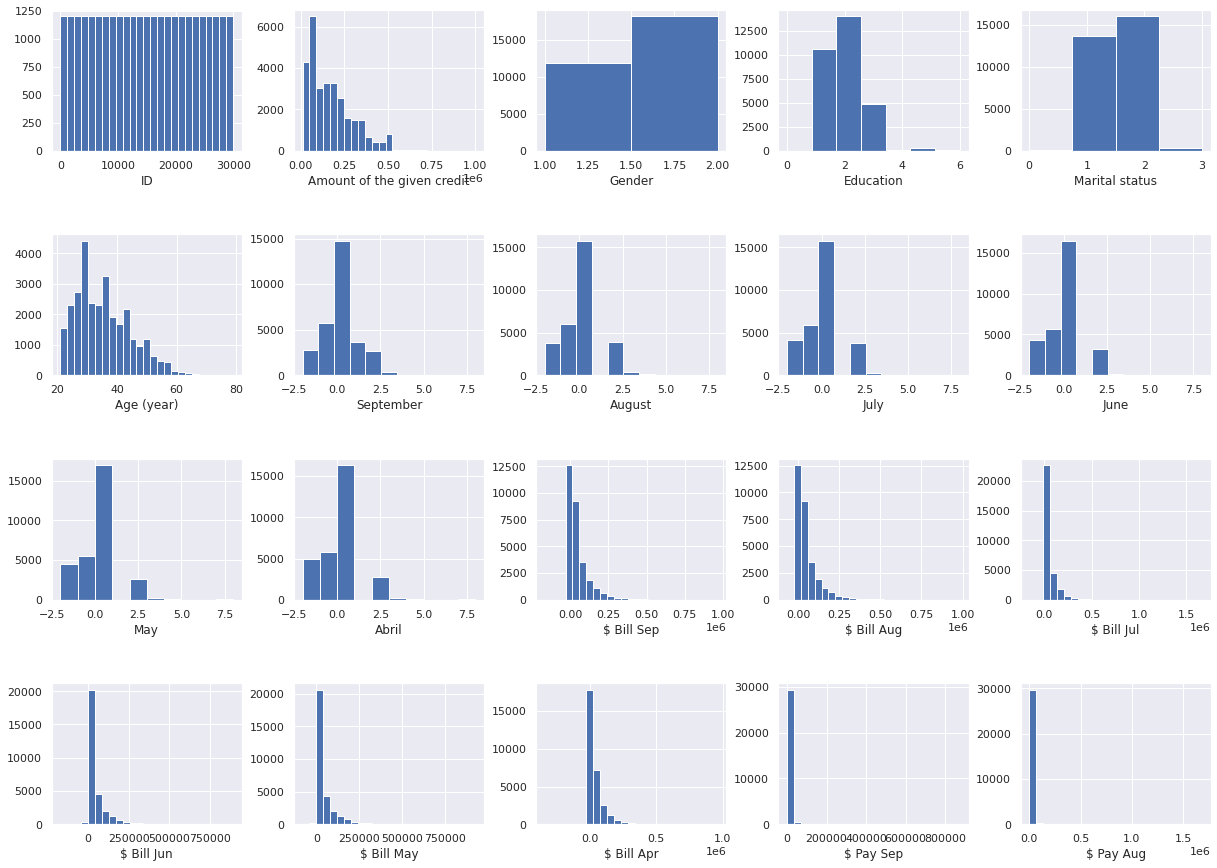

In [124]:
sns.set(rc={"figure.figsize": (17, 12)})
# Crea el espacio de trabajo como una matriz de 3 x 4 para acomodar las 10 variables
fig, axes = plt.subplots(4, 5)
# Espacio entre gráficas
fig.tight_layout(h_pad=5.0)

# Grafica los histogramas uno por uno
for k in range(0, 20):
    # Posición sequencial. Van de 1 a 10 en este caso (no 0)
    plt.subplot(4, 5, k + 1)
    # Número de valores diferentes.
    buckets = df.iloc[:, k].nunique()
    # Si el número de valores es mayor de 10, declara el número de buckets como 15
    # si es <=10 usa ese número de buckets
    if buckets > 20:
        buckets = 25
    # Crea el histograma
    df.iloc[:, k].hist(bins=buckets)
    # Nombra el eje X de acuerdo a la columna que está siendo visualizada
    plt.xlabel(df.columns[k])
# Despliega la figura con las 10 gráficas
plt.show()

In [162]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(df))
MinMaxScaler()
print(scaler.data_max_)

MinMaxScaler()
[3.000000e+04 1.000000e+06 2.000000e+00 6.000000e+00 3.000000e+00
 7.900000e+01 8.000000e+00 8.000000e+00 8.000000e+00 8.000000e+00
 8.000000e+00 8.000000e+00 9.645110e+05 9.839310e+05 1.664089e+06
 8.915860e+05 9.271710e+05 9.616640e+05 8.735520e+05 1.684259e+06
 8.960400e+05 6.210000e+05 4.265290e+05 5.286660e+05 1.000000e+00]


In [154]:
for v in datos_cat+datos_bin: #datos.columns:
    print(v)
    print(df[v].unique())
    print("-----")

Gender
[2. 1.]
-----
Marital status
[1. 2. 3. 0.]
-----
Education
[2. 1. 3. 5. 4. 6. 0.]
-----
Y
[1. 0.]
-----


In [149]:
cat_pipeline = Pipeline(
    steps=[
        ("impModa", SimpleImputer(strategy="most_frequent")),
        ("OneHotE", OneHotEncoder(handle_unknown="ignore")),
    ]
)
cat_pipeline_nombres = datos_cat
num_pipeline = Pipeline(
    steps=[
        ("impMediana", SimpleImputer(strategy="median")),
        ("Box-Cox", PowerTransformer(method="box-cox")),
        ("escalaNum", MinMaxScaler()),
    ]
)
num_pipeline_nombres = datos_num

bin_pipeline_nombres = datos_bin


columnasTransformer = ColumnTransformer(
    transformers=[
        ("catpipe", cat_pipeline, cat_pipeline_nombres + bin_pipeline_nombres),
        ("numpipe", num_pipeline, num_pipeline_nombres),
        
    ],
    remainder="passthrough",
)